In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, auc


df=pd.read_csv('Data.csv')

In [2]:
df.describe()


,NPG,PGL,DIA,TSF,INS,BMI,DPF,AGE,Diabetic
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


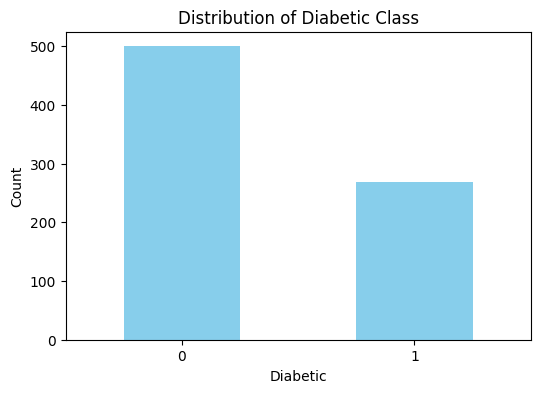

In [3]:
plt.figure(figsize=(6, 4))
df['Diabetic'].value_counts().plot(kind='bar', color=['skyblue', 'skyblue'])
plt.title('Distribution of Diabetic Class')
plt.xlabel('Diabetic')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

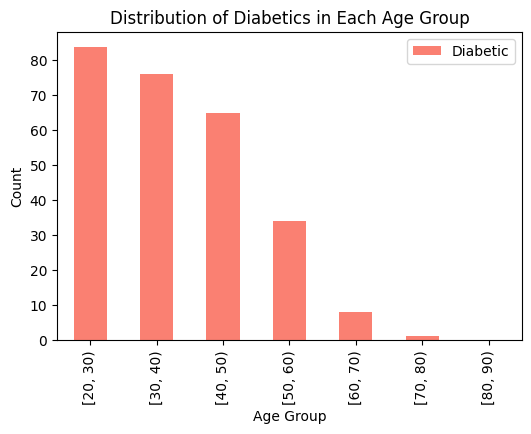

In [4]:
bins = [20, 30, 40, 50, 60, 70, 80, 90]

# Create a new column 'Age Group' based on the defined bins
df['Age Group'] = pd.cut(df['AGE'], bins=bins, right=False)

# Plot histograms for each age group
plt.figure(figsize=(6, 4))
df[df['Diabetic'] == 1]['Age Group'].value_counts().sort_index().plot(kind='bar', color='salmon', label='Diabetic')
plt.title('Distribution of Diabetics in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend()
plt.show()

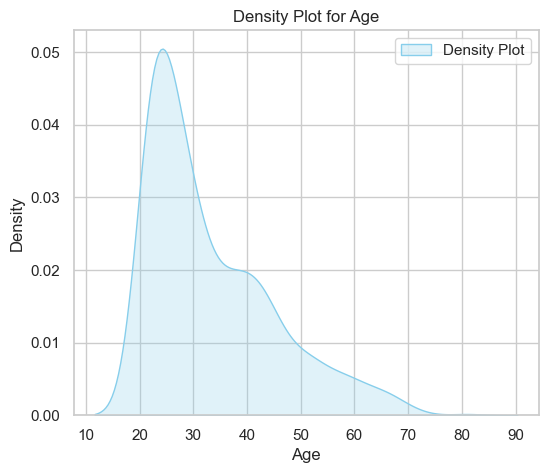

In [5]:
sns.set(style="whitegrid")

# Create a density plot for the 'Age' column
plt.figure(figsize=(6, 5))
sns.kdeplot(df['AGE'], fill=True, color='skyblue', label='Density Plot')
plt.title('Density Plot for Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

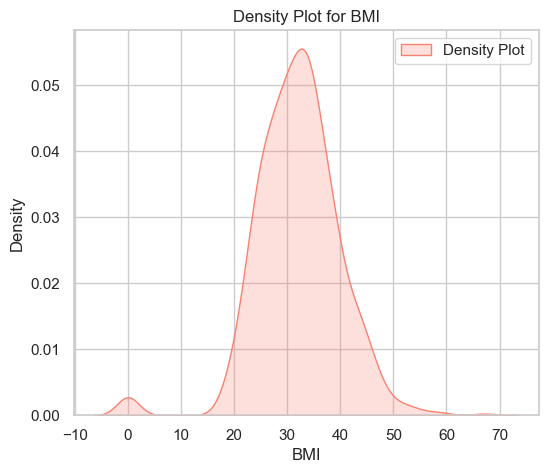

In [6]:
sns.set(style="whitegrid")

# Create a density plot for the 'BMI' column
plt.figure(figsize=(6,5))
sns.kdeplot(df['BMI'], fill=True, color='salmon', label='Density Plot')
plt.title('Density Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend()
plt.show()

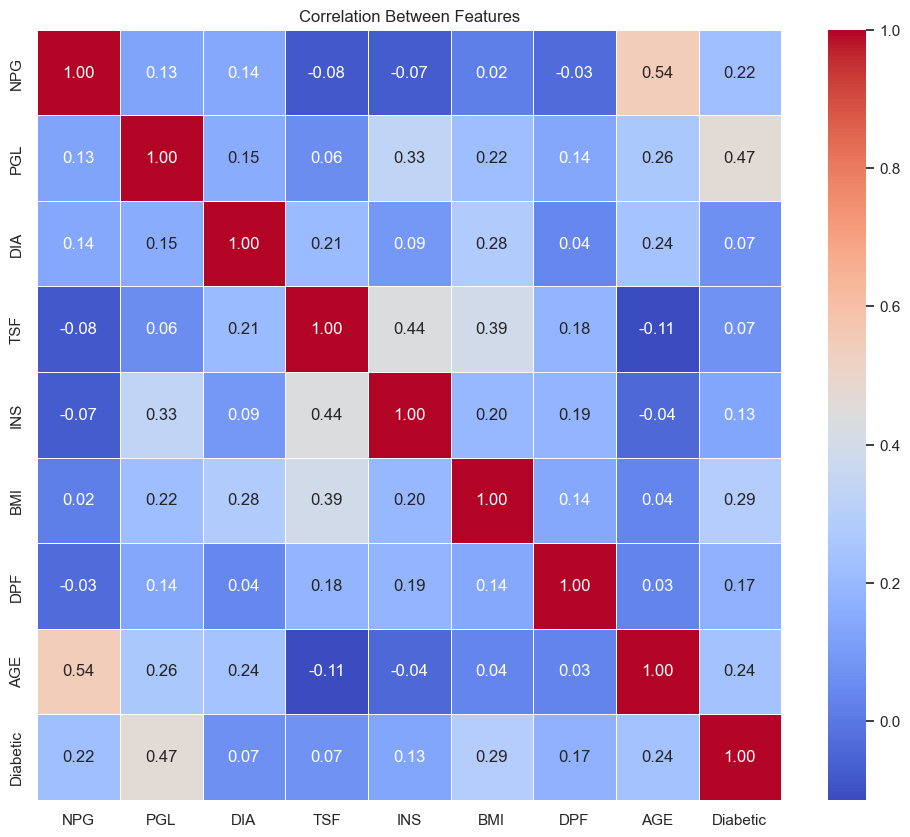

In [7]:
correlation_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Between Features')
plt.show()

Mean Squared Error on Test Set: 82.377217544925
R-squared on Test Set: 0.3442377338423347
Mean Absolute Error: 6.75958389905108



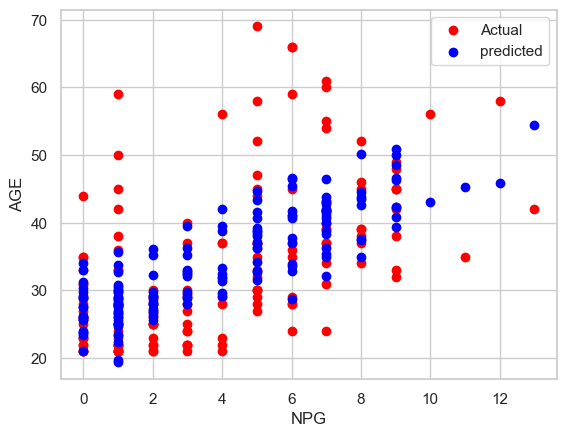

In [8]:


df = df.dropna()

# Prepare Features and Target
X = df.drop(["AGE", "Age Group"], axis=1)
y = df['AGE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train Linear Regression Model on Training Set
model_LR1 = LinearRegression()
model_LR1.fit(X_train, y_train)

# Predict 'Age' on Test Set
predicted_age_test = model_LR1.predict(X_test)

# Evaluate the model performance on Test Set
mse_test = mean_squared_error(y_test, predicted_age_test)
r2_test = r2_score(y_test, predicted_age_test)
mae = mean_absolute_error(y_test, predicted_age_test)

print(f"Mean Squared Error on Test Set: {mse_test}")
print(f"R-squared on Test Set: {r2_test}")
print(f"Mean Absolute Error: {mae}\n")

plt.scatter(X_test['NPG'], y_test, label='Actual', color='red')

plt.scatter(X_test['NPG'], predicted_age_test, label='predicted', color='blue')

plt.xlabel('NPG')
plt.ylabel('AGE')
plt.legend()




Mean Squared Error on Test Set: 75.88581346785304
R-squared on Test Set: 0.3745706591970399
Mean Absolute Error: 6.284650778084714



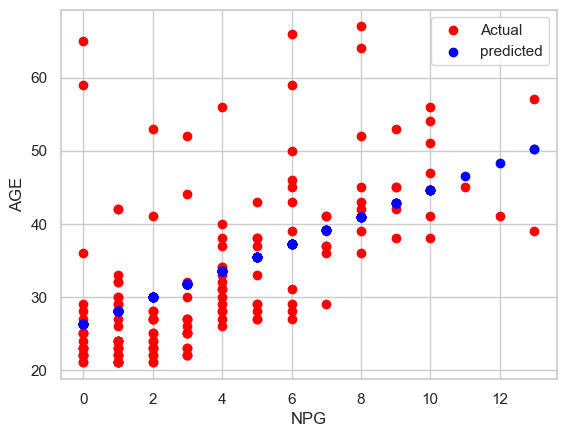

In [9]:
df = df.dropna()

# Prepare Features and Target
X = df[['NPG']]
y = df['AGE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train Linear Regression Model on Training Set
model_LR2 = LinearRegression()
model_LR2.fit(X_train, y_train)

predicted = model_LR2.predict(X_test)

# Evaluate the model performance on Test Set
mse_test = mean_squared_error(y_test, predicted)
r2_test = r2_score(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)


print(f"Mean Squared Error on Test Set: {mse_test}")
print(f"R-squared on Test Set: {r2_test}")
print(f"Mean Absolute Error: {mae}\n")

plt.scatter(X_test['NPG'], y_test, label='Actual', color='red')

plt.scatter(X_test['NPG'], predicted, label='predicted', color='blue')

plt.xlabel('NPG')
plt.ylabel('AGE')
plt.legend()



Mean Squared Error on Test Set: 87.13582984469328
R-squared on Test Set: 0.319061335291261
Mean Absolute Error: 7.087947992562151



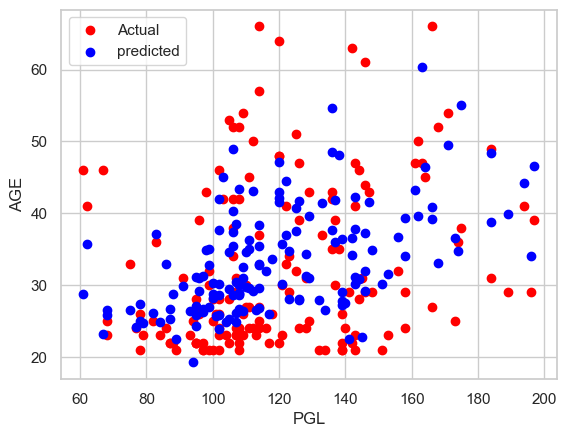

In [10]:
df = df.dropna()

X = df[['PGL', 'NPG', 'DIA']]
y = df['AGE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train Linear Regression Model on Training Set
model_LR3 = LinearRegression()
model_LR3.fit(X_train, y_train)

predicted = model_LR3.predict(X_test)

# Evaluate the model performance on Test Set
mse_test = mean_squared_error(y_test, predicted)
r2_test = r2_score(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)


print(f"Mean Squared Error on Test Set: {mse_test}")
print(f"R-squared on Test Set: {r2_test}")
print(f"Mean Absolute Error: {mae}\n")

plt.scatter(X_test[['PGL']], y_test, label='Actual', color='red')

plt.scatter(X_test[['PGL']], predicted, label='predicted', color='blue')

plt.xlabel('PGL')
plt.ylabel('AGE')
plt.legend()




C:\Users\yaqee\AppData\Local\Temp\ipykernel_660\2698813432.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({'k': [k], 'Accuracy': [accuracy], 'ROC/AUC': [roc_auc]})], ignore_index=True)


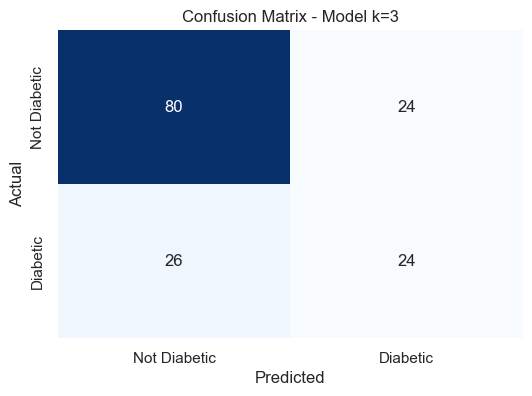

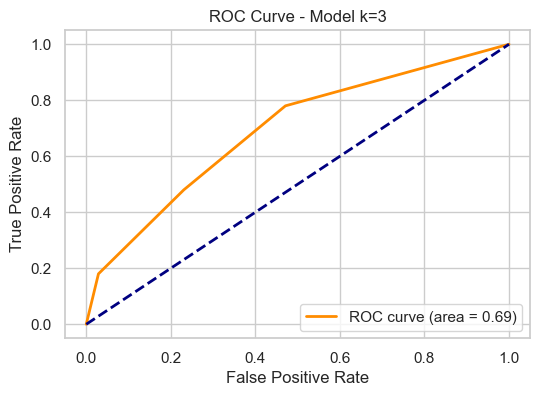

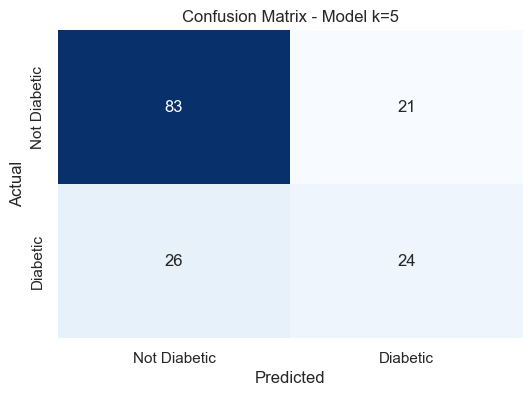

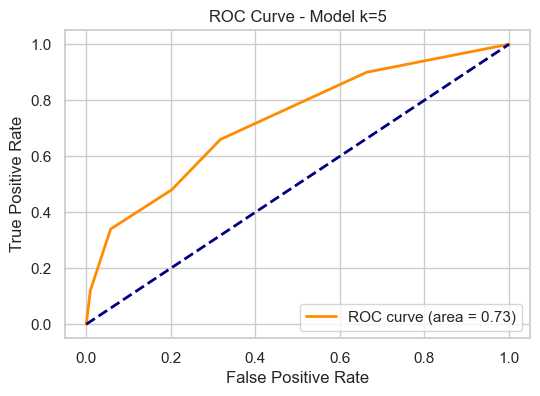

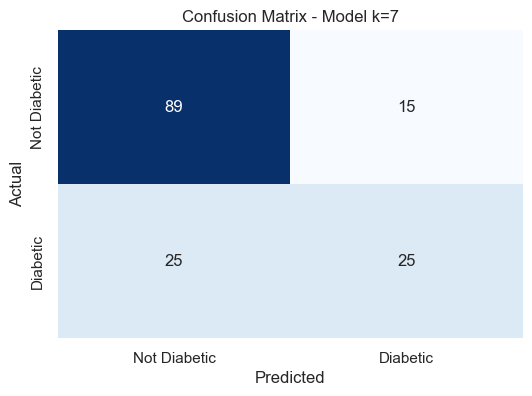

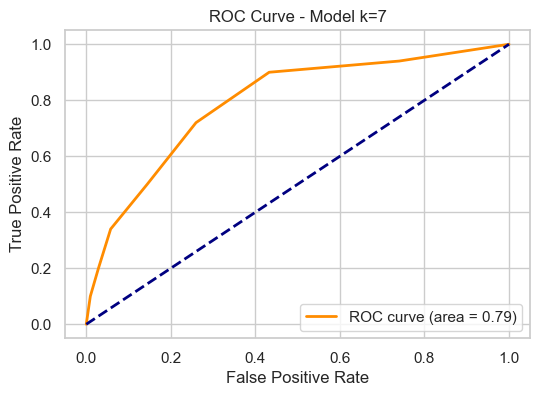

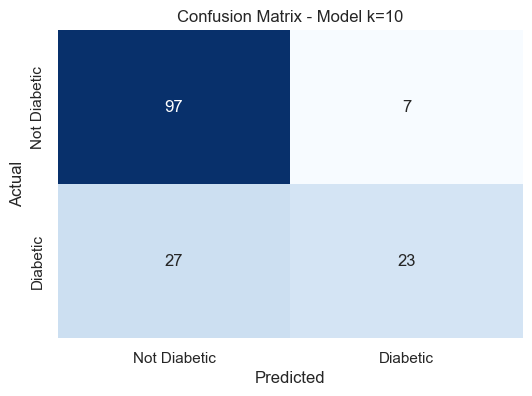

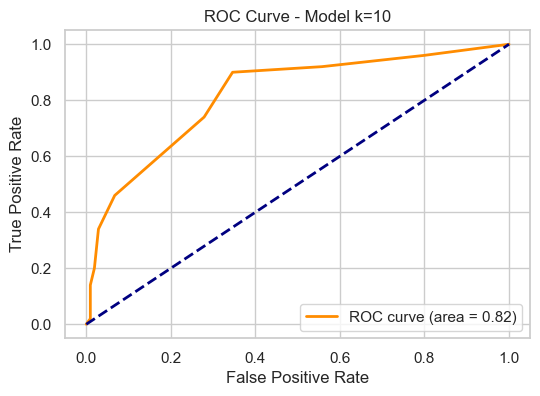

    k  Accuracy   ROC/AUC
0   3  0.675325  0.691346
1   3  0.675325  0.691346
2   5  0.694805  0.726250
3   5  0.694805  0.726250
4   7  0.740260  0.792981
5   7  0.740260  0.792981
6  10  0.779221  0.818173
7  10  0.779221  0.818173


In [11]:

def train_knn(df, k_values):
    df = df.dropna()

    X = df.drop(['Diabetic','Age Group'], axis=1)
    y = df['Diabetic']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {}  # Dictionary to store trained models with different k values
    results = pd.DataFrame(columns=['k', 'Accuracy', 'ROC/AUC'])  # Initialize an empty DataFrame outside the loop

    for k in k_values:
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train, y_train)
        y_pred = knn_model.predict(X_test)

        # Calculate and store metrics
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

        models[f'Model_k_{k}'] = knn_model
        results = pd.concat([results, pd.DataFrame({'k': [k], 'Accuracy': [accuracy], 'ROC/AUC': [roc_auc]})], ignore_index=True)

        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Not Diabetic', 'Diabetic'], yticklabels=['Not Diabetic', 'Diabetic'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - Model k={k}')
        plt.show()
         # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - Model k={k}')
        plt.legend(loc='lower right')
        plt.show()

        models[f'Model_k_{k}'] = knn_model
        results = pd.concat([results, pd.DataFrame({'k': [k], 'Accuracy': [accuracy], 'ROC/AUC': [roc_auc]})],
                            ignore_index=True)


    return models, results

k_values = [3, 5, 7, 10]
trained_models, performance_results = train_knn(df, k_values)

print(performance_results)



    TN   FP
    FN   TP